In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models



2023-07-13 03:00:01.163072: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# Load the dataset from the CSV file
dataset = pd.read_csv('/Users/paoloartasensi/Python_Scripts/ML Experiment/test_mov_1689207487014.csv')

# Drop the 'totacc', 'mov', and 'prob' columns from the dataset
#dataset = dataset.drop(['totacc', 'mov', 'prob'], axis=1)

# Create a new DataFrame with the remaining columns
df = pd.DataFrame(dataset)

# Print the first five rows of the new DataFrame
df.head()



,time,ax,ay,az,p,r,label
0,1689207473399,0.123,0.761,0.752,-44.963,9.289,1
1,1689207473502,0.111,0.632,0.950,-33.455,6.664,1
2,1689207473604,0.097,0.687,1.000,-34.364,5.540,1
3,1689207473707,0.014,0.727,1.081,-33.920,0.742,1
4,1689207473809,-0.120,0.669,1.094,-31.294,-6.260,1


In [3]:
## SCALING ##
# Select all columns except the last one
cols_to_scale = df.columns[:-1]

# Apply the StandardScaler to the selected columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_to_scale]), columns=cols_to_scale)

# Concatenate the scaled columns with the last column (not scaled)
df_scaled = pd.concat([df_scaled, df.iloc[:, -1]], axis=1)

df_scaled.describe()

,time,ax,ay,az,p,r,label
count,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,131.000000
mean,2.269307e-08,-8.135986e-17,3.559494e-17,-1.720422e-16,-1.271248e-17,5.423990e-17,0.519084
std,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,0.501554
min,-1.719303e+00,-2.014623e+00,-2.784941e+00,-3.342682e+00,-1.278904e+00,-2.835474e+00,0.000000
25%,-8.552752e-01,-9.357107e-01,-6.781782e-01,-3.587149e-01,-7.114331e-01,-4.166118e-01,0.000000
50%,3.679325e-03,2.754094e-01,3.958576e-01,1.712507e-01,-3.493787e-01,7.306676e-02,1.000000
75%,8.564187e-01,7.617461e-01,8.265046e-01,7.559932e-01,3.890100e-01,2.309837e-01,1.000000
max,1.720066e+00,1.573881e+00,1.112570e+00,1.411946e+00,2.631079e+00,3.958566e+00,1.000000


In [5]:
#df_scaled = df

In [4]:
# Separate the features from the target variable
X = df_scaled.drop(['label'], axis=1).values
y = df_scaled['label'].values

# Convert the target variable to binary values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for use in a CNN
input_shape = (X_train.shape[1], 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
7/7 [==============================] - 7s 171ms/step - loss: 0.7094 - accuracy: 0.4712 - val_loss: 0.7175 - val_accuracy: 0.4815
Epoch 2/10
7/7 [==============================] - 0s 65ms/step - loss: 0.7030 - accuracy: 0.4231 - val_loss: 0.7110 - val_accuracy: 0.4815
Epoch 3/10
7/7 [==============================] - 0s 34ms/step - loss: 0.6975 - accuracy: 0.4808 - val_loss: 0.7052 - val_accuracy: 0.4815
Epoch 4/10
7/7 [==============================] - 0s 31ms/step - loss: 0.6934 - accuracy: 0.5192 - val_loss: 0.7013 - val_accuracy: 0.4815
Epoch 5/10
7/7 [==============================] - 0s 49ms/step - loss: 0.6891 - accuracy: 0.5481 - val_loss: 0.6968 - val_accuracy: 0.5556
Epoch 6/10
7/7 [==============================] - 0s 32ms/step - loss: 0.6862 - accuracy: 0.5577 - val_loss: 0.6924 - val_accuracy: 0.5926
Epoch 7/10
7/7 [==============================] - 0s 22ms/step - loss: 0.6831 - accuracy: 0.5865 - val_loss: 0.6900 - val_accuracy: 0.6296
Epoch 8/10
7/7 [==========

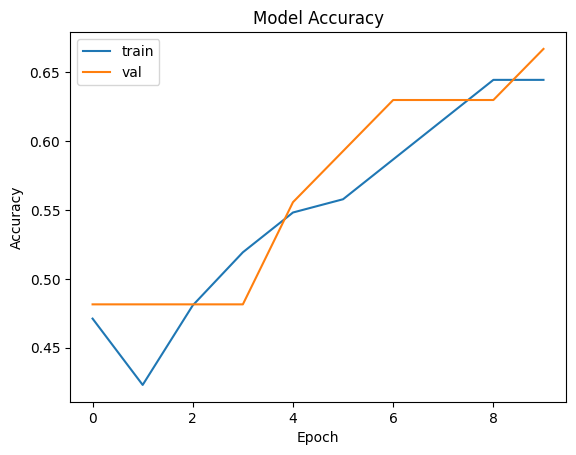

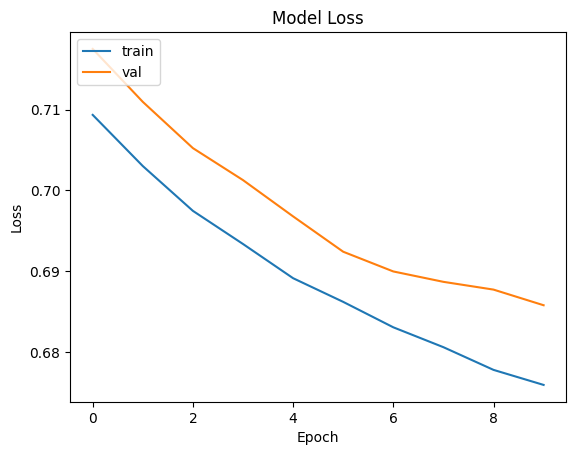

In [5]:

# plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 258ms/step


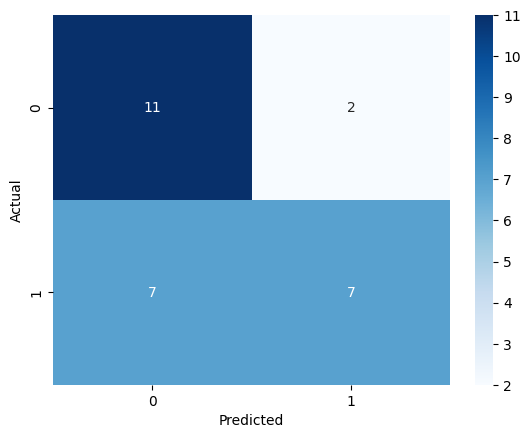

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [7]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 0.01
    if epoch > 5:
        lr = 0.001
    if epoch > 10:
        lr = 0.0001
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


Epoch 1/20
7/7 [==============================] - 2s 56ms/step - loss: 0.6981 - accuracy: 0.5192 - val_loss: 0.6746 - val_accuracy: 0.5556 - lr: 0.0100
Epoch 2/20
7/7 [==============================] - 0s 24ms/step - loss: 0.6649 - accuracy: 0.5865 - val_loss: 0.6601 - val_accuracy: 0.6296 - lr: 0.0100
Epoch 3/20
7/7 [==============================] - 0s 31ms/step - loss: 0.6522 - accuracy: 0.6250 - val_loss: 0.6644 - val_accuracy: 0.6667 - lr: 0.0100
Epoch 4/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6427 - accuracy: 0.6346 - val_loss: 0.6599 - val_accuracy: 0.6667 - lr: 0.0100
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.6414 - accuracy: 0.6058 - val_loss: 0.6324 - val_accuracy: 0.6667 - lr: 0.0100
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6419 - accuracy: 0.6442 - val_loss: 0.6498 - val_accuracy: 0.5926 - lr: 0.0100
Epoch 7/20
7/7 [==============================] - 0s 23ms/step - loss: 0.6233 - accuracy

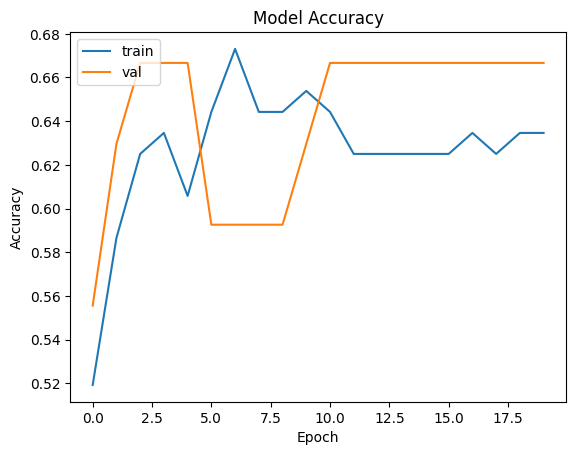

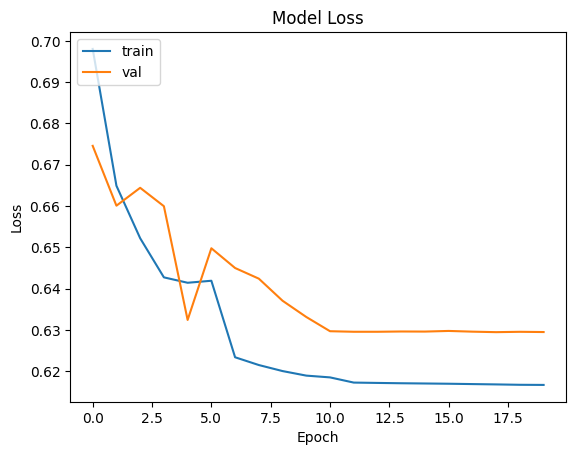

In [8]:
# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

